<a href="https://colab.research.google.com/github/brunaruppruela/mestrado_IFES_IA/blob/main/ANN%5CExercicio_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EXERCICIO - ANN - 01-04-2024##

Você deve implementar e testar um Multi Layer Perceptron (MLP) e comprar o resultado dele com o implementado no Scikit-Learn.

O seu MLP deve aceitar parâmetros para definir a quantidade de camadas, assim como a quantidade de neurônios em cada camada e a função de ativação que será utilizada em cada camada.

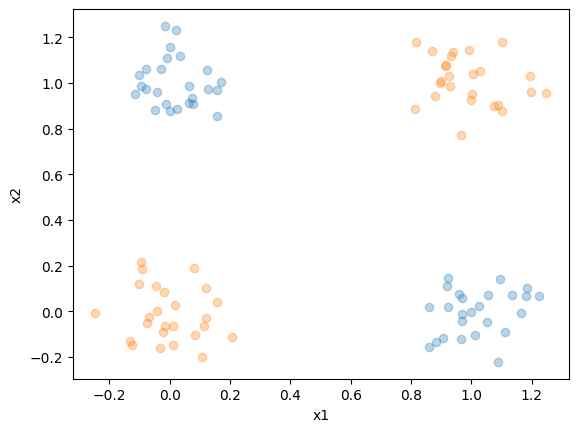

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

def sign(a):
  return (a>0) * 2 - 1

def criaDataset(n=100, func=lambda a, b: bool(a) != bool(b)):
  # a funcao make_blobs gera os conjuntos de pontos e os coloca nas coordenadas "centers". O desvio padrão dos pontos é 0.1
  X, y = make_blobs(n_samples=n, centers=[[0,0],[1,0],[1,1],[0,1]], cluster_std=0.1)
  y = sign(np.array([func(x[0]>0.5, x[1]>0.5) for x in X], dtype=int))
  return X, y

X, y = criaDataset()

def plotDataset(X, y):
  plt.xlabel("x1")
  plt.ylabel("x2")
  for k in set(y):
    plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotDataset(X, y)

In [ ]:
'''a função func é aplicada a cada ponto gerado. Ela verifica se a primeira coordenada (x[0]) é diferente da segunda coordenada (x[1]).
Se for diferente, o rótulo é verdadeiro (1); caso contrário, é falso (0).
Os rótulos resultantes são armazenados na variável y.
O conjunto de pontos gerado é armazenado na variável X.
O conjunto de dados final consiste em pares de entrada-saída (X, y).'''

X,y

In [4]:
from sklearn.base import BaseEstimator, ClassifierMixin

# Adiciona bias à matriz X
def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

def defineAxes(X):
    offset = 0.5
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plotPredictions(clf, X):
    axes = defineAxes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
from scipy.special import expit
# Função de ativação tangente hiperbólica
def tanh(a):
  return expit(a)*2-1

Acuracia: 1.0


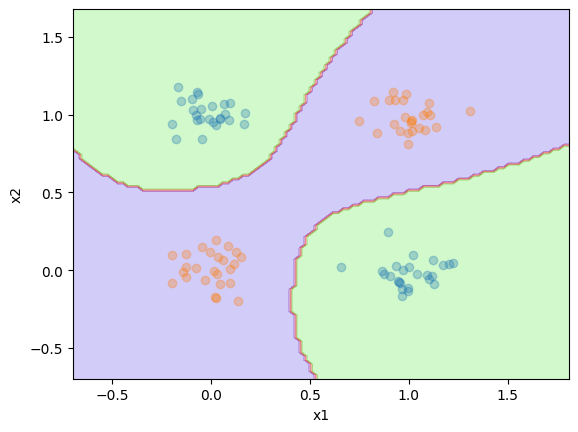

In [19]:
X, y = criaDataset(100, lambda a, b: bool(a) != bool(b))
plotDataset(X, y)

class Backpropagation(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=1000, learning_rate=0.005, n_hidden=[2], activation=tanh):
    self.max_iter = max_iter
    self.learning_rate = learning_rate
    self.n_hidden = n_hidden
    self.activation = activation

  def forward(self, X):
    self.A = []
    self.Z = []
    AUX = X.copy()
    for W in self.Ws:
      self.A.append(include_bias(AUX))
      self.Z.append(self.A[-1] @ W)
      AUX = tanh(self.Z[-1])
    return AUX

  def backward(self, X, y, ypred):
    grads = [] # Lista para armazenar os gradientes de cada camada
    output_delta = y.reshape(-1,1) - ypred.reshape(-1,1)
    grads.insert(0, self.A[-1].T @ output_delta) # Gradiente da camada de saída
    for i in range(len(self.Ws)-1, 0, -1):
      #tanh_grad = (1 - np.square(tanh(self.Z[i-1])))
      activation_grad = (1 - np.square(self.activation(self.Z[i - 1])))
      input_delta = (output_delta @ self.Ws[i][1:,:].T) * activation_grad
      grads.insert(0, self.A[i-1].T @ input_delta) # Gradiente das camadas intermediárias
      output_delta = input_delta.copy()
    for i in range(len(self.Ws)-1, -1, -1):
      self.Ws[i] += grads[i] * self.learning_rate # Atualização dos pesos

  def fit(self, X, y):
    self.Ws = [] # Lista para armazenar os pesos de cada camada
    previous_output = X.shape[1]
    for layer_size in self.n_hidden:
      self.Ws.append(np.random.uniform(-1, 1, size=(previous_output+1, layer_size)))
      previous_output = self.Ws[-1].shape[1]
    self.Ws.append(np.random.uniform(-1, 1, size=(previous_output+1, 1))) # Camada de saída
    for _ in range(self.max_iter):
      ypred = self.forward(X)
      self.backward(X, y, ypred)

  def predict(self, X):
    return sign(self.forward(X))  # Função de ativação para previsões

#passagem da quantidade de camadas e escolha da funcao
clf = Backpropagation(n_hidden=[10, 10], activation=tanh)
clf.fit(X, y)
plotPredictions(clf, X)
ypred = clf.predict(X)
print(f"Acuracia: {accuracy_score(y, ypred)}")

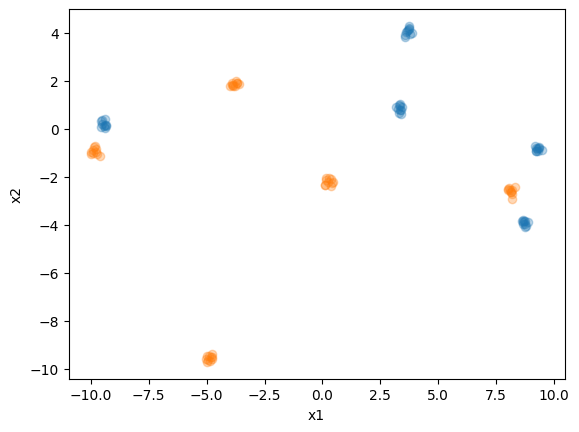

In [20]:
def criaDatasetDificil(n=100, centros=10):
  X, y = make_blobs(n_samples=n, centers=centros, cluster_std=0.1)
  y = sign(np.array(y%2, dtype=int))
  return X, y

X, y = criaDatasetDificil()

plotDataset(X, y)

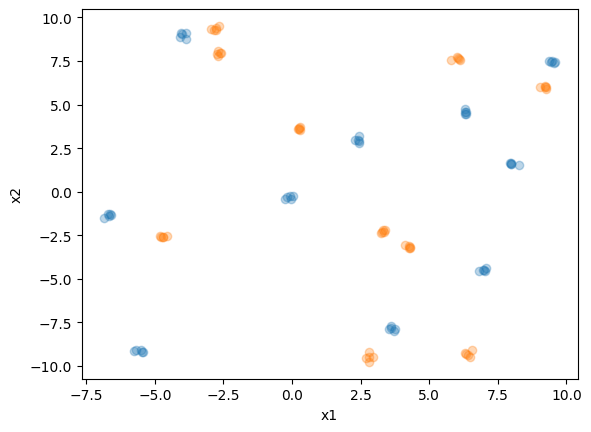

In [31]:
X, y = criaDatasetDificil(centros=20)
plotDataset(X, y)

0.75

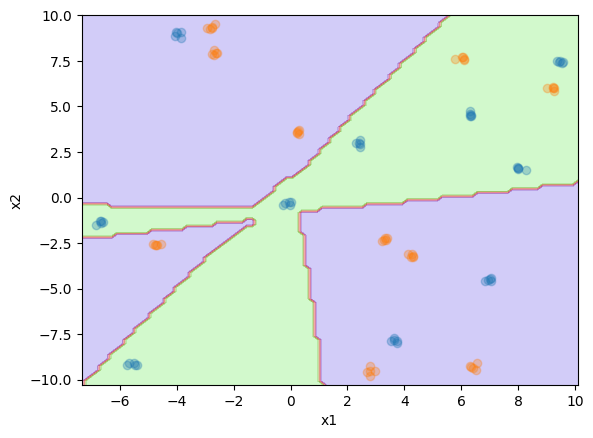

In [35]:
plotDataset(X, y)
clf = Backpropagation(n_hidden=[10,10,2], activation=tanh)
clf.fit(X, y)
plotPredictions(clf, X)
ypred = clf.predict(X)
accuracy_score(y, ypred)